## Analysis Team 

#### Team 8

1. Maruthamuthu K Sowmeya (Codes & Comments)
2. Rujuta Prakash Lanke
3. Aditya Kulkarni


### Project Summary 

####  Identifying Factors Influencing Motor Vehicle Collisions in NYC

1. The project aims to analyze vehicle collision in New York City (NYC), identify important factors contributing to accidents. By leveraging data exploration, visualization, and statistical analysis, the study seeks to gain insights into traffic safety and improve decision-making for targeted interventions.
2. The project's findings will contribute to evidence-based decision-making for traffic safety initiatives in NYC. By identifying important factors contributing to collisions, stakeholders and policymakers can develop targeted interventions to reduce accident rates and enhance traffic safety in the city.
3.  The objectives would be:
    1. Data Exploration and Preprocessing: Explore the dataset to understand the characteristics of the variables and handle any missing or inconsistent data.
    2. Data Visualization: Visualize the data through plots and graphs to uncover trends, patterns, and potential correlations between variables.
    3. Data Analysis and Hypothesis Testing: Conduct statistical analysis to test hypotheses and identify significant factors that contribute to motor vehicle collisions.
    4. Feature Importance: Utilize machine learning algorithms to determine the importance of each variable in predicting collisions.

In [1]:
#Importing pyhton libraries
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import re
#Add additional libraries below this line
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

import statsmodels.api as sm
pd.options.display.max_rows = 25
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath="~/datasets/ist652/Summer2023/Project_Data_.csv"
 
data= pd.read_csv(filepath)
pd.set_option('display.max_columns', None)
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,17044639,3434155,05/02/16,17:35,219456,NY,4 dr sedan,MERZ -CAR/SUV,NaN,2015.0,East,2.0,M,Licensed,FL,Merging,Right Front Bumper,Right Front Bumper,Right Front Quarter Panel,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unsafe Lane Changing
2,19138701,4229067,10/24/2019,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
3,17303317,3503027,08/18/2016,12:39,672828,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,Southwest,2.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified
4,17285715,3487936,07/22/2016,15:40,554272,NY,Convertible,VOLK -CAR/SUV,NaN,2013.0,South,1.0,M,Licensed,NY,Stopped in Traffic,Right Rear Bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,NaN,N,NaN,Unspecified,Unspecified


In [3]:
data.shape

(154271, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154271 entries, 0 to 154270
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   UNIQUE_ID                    154271 non-null  int64  
 1   COLLISION_ID                 154271 non-null  int64  
 2   CRASH_DATE                   154271 non-null  object 
 3   CRASH_TIME                   154271 non-null  object 
 4   VEHICLE_ID                   154271 non-null  object 
 5   STATE_REGISTRATION           153470 non-null  object 
 6   VEHICLE_TYPE                 154267 non-null  object 
 7   VEHICLE_MAKE                 151260 non-null  object 
 8   VEHICLE_MODEL                22091 non-null   object 
 9   VEHICLE_YEAR                 152086 non-null  float64
 10  TRAVEL_DIRECTION             154255 non-null  object 
 11  VEHICLE_OCCUPANTS            154267 non-null  float64
 12  DRIVER_SEX                   154271 non-null  object 
 13 

# Cleaning the Dataset 1

In [5]:
data.head() # Previewing the dataset 1.

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,17044639,3434155,05/02/16,17:35,219456,NY,4 dr sedan,MERZ -CAR/SUV,NaN,2015.0,East,2.0,M,Licensed,FL,Merging,Right Front Bumper,Right Front Bumper,Right Front Quarter Panel,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unsafe Lane Changing
2,19138701,4229067,10/24/2019,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
3,17303317,3503027,08/18/2016,12:39,672828,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,Southwest,2.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified
4,17285715,3487936,07/22/2016,15:40,554272,NY,Convertible,VOLK -CAR/SUV,NaN,2013.0,South,1.0,M,Licensed,NY,Stopped in Traffic,Right Rear Bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,NaN,N,NaN,Unspecified,Unspecified


### Convert anf format Dates and Time ; Sort the Data based on 'CRASH_DATE'

In [6]:
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])
date_format = '%Y-%m-%d'
data.sort_values(by=['CRASH_DATE'], inplace=True)# Sorting the data based on the year in which the car was registered.
data=data.reset_index(drop=True)

data['CRASH_TIME'] = pd.to_datetime(data['CRASH_TIME'], format='%H:%M')
data['CRASH_TIME'] = data['CRASH_TIME'].dt.strftime('%H:%M')
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,17307404,3493857,2012-07-31,13:30,591401,NY,Box Truck,GMC-TRUCK/BUS,NaN,1997.0,West,0.0,M,Licensed,NY,Changing Lanes,Right Side Doors,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified
1,17295384,3518768,2012-09-12,12:20,780983,NY,Sedan,HOND -CAR/SUV,NaN,2000.0,South,1.0,M,Licensed,NY,Making Left Turn,Left Front Bumper,Left Front Bumper,Center Front End,Left Front Quarter Panel,NaN,N,NaN,Driver Inexperience,Turning Improperly
2,17218669,3576809,2012-12-09,12:03,1178874,NJ,Taxi,CADI -CAR/SUV,NaN,2015.0,West,0.0,M,Licensed,NJ,Entering Parked Position,Right Rear Quarter Panel,Right Rear Quarter Panel,No Damage,No Damage,No Damage,N,NaN,Passing Too Closely,Unspecified
3,17143961,3421148,2013-04-05,09:40,453654,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,FORD ECP,2015.0,North,1.0,M,Licensed,NY,Backing,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
4,17272443,3467155,2013-06-23,08:30,437750,NY,4 dr sedan,TOYT -CAR/SUV,NaN,2012.0,South,2.0,F,Licensed,NY,Going Straight Ahead,Right Rear Bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,No Damage,N,NaN,Unspecified,Unspecified


### Convert 'VEHICLE_YEAR' null values to 0 and data type to int format

In [7]:
data['VEHICLE_YEAR'].fillna(0, inplace=True)
data['VEHICLE_YEAR'] = data['VEHICLE_YEAR'].astype(int)
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,17307404,3493857,2012-07-31,13:30,591401,NY,Box Truck,GMC-TRUCK/BUS,NaN,1997,West,0.0,M,Licensed,NY,Changing Lanes,Right Side Doors,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified
1,17295384,3518768,2012-09-12,12:20,780983,NY,Sedan,HOND -CAR/SUV,NaN,2000,South,1.0,M,Licensed,NY,Making Left Turn,Left Front Bumper,Left Front Bumper,Center Front End,Left Front Quarter Panel,NaN,N,NaN,Driver Inexperience,Turning Improperly
2,17218669,3576809,2012-12-09,12:03,1178874,NJ,Taxi,CADI -CAR/SUV,NaN,2015,West,0.0,M,Licensed,NJ,Entering Parked Position,Right Rear Quarter Panel,Right Rear Quarter Panel,No Damage,No Damage,No Damage,N,NaN,Passing Too Closely,Unspecified
3,17143961,3421148,2013-04-05,09:40,453654,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,FORD ECP,2015,North,1.0,M,Licensed,NY,Backing,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
4,17272443,3467155,2013-06-23,08:30,437750,NY,4 dr sedan,TOYT -CAR/SUV,NaN,2012,South,2.0,F,Licensed,NY,Going Straight Ahead,Right Rear Bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,No Damage,N,NaN,Unspecified,Unspecified


### Convert 'VEHICLE_YEAR' data type to int format

In [8]:
data['VEHICLE_OCCUPANTS'].fillna(0, inplace=True)
data['VEHICLE_OCCUPANTS'] = data['VEHICLE_OCCUPANTS'].astype(int)
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,17307404,3493857,2012-07-31,13:30,591401,NY,Box Truck,GMC-TRUCK/BUS,NaN,1997,West,0,M,Licensed,NY,Changing Lanes,Right Side Doors,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified
1,17295384,3518768,2012-09-12,12:20,780983,NY,Sedan,HOND -CAR/SUV,NaN,2000,South,1,M,Licensed,NY,Making Left Turn,Left Front Bumper,Left Front Bumper,Center Front End,Left Front Quarter Panel,NaN,N,NaN,Driver Inexperience,Turning Improperly
2,17218669,3576809,2012-12-09,12:03,1178874,NJ,Taxi,CADI -CAR/SUV,NaN,2015,West,0,M,Licensed,NJ,Entering Parked Position,Right Rear Quarter Panel,Right Rear Quarter Panel,No Damage,No Damage,No Damage,N,NaN,Passing Too Closely,Unspecified
3,17143961,3421148,2013-04-05,09:40,453654,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,FORD ECP,2015,North,1,M,Licensed,NY,Backing,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
4,17272443,3467155,2013-06-23,08:30,437750,NY,4 dr sedan,TOYT -CAR/SUV,NaN,2012,South,2,F,Licensed,NY,Going Straight Ahead,Right Rear Bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,No Damage,N,NaN,Unspecified,Unspecified


### Convert all vehicle damages into single column as comma-seperated list

In [9]:
data['VEHICLE_DAMAGE']=data['VEHICLE_DAMAGE'].replace({'No Damage':''})
data['VEHICLE_DAMAGE_1']=data['VEHICLE_DAMAGE_1'].replace({'No Damage':''})
data['VEHICLE_DAMAGE_2']=data['VEHICLE_DAMAGE_2'].replace({'No Damage':''})
data['VEHICLE_DAMAGE_3']=data['VEHICLE_DAMAGE_3'].replace({'No Damage':''})
data['VEHICLE_DAMAGE']= data['VEHICLE_DAMAGE'].fillna('')
data['VEHICLE_DAMAGE_1']= data['VEHICLE_DAMAGE_1'].fillna('')
data['VEHICLE_DAMAGE_2']= data['VEHICLE_DAMAGE_2'].fillna('')
data['VEHICLE_DAMAGE_3']= data['VEHICLE_DAMAGE_3'].fillna('')
data['VEHICLE_DAMAGES'] = data["VEHICLE_DAMAGE"]+','+data['VEHICLE_DAMAGE_1']+','+data['VEHICLE_DAMAGE_2']+','+data['VEHICLE_DAMAGE_3']

def remove_repeated_commas(text):
    return re.sub(r'^,+|,+$|,(?=,)', '', text)
data['VEHICLE_DAMAGES'] = data['VEHICLE_DAMAGES'].apply(remove_repeated_commas)
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,VEHICLE_DAMAGES
0,17307404,3493857,2012-07-31,13:30,591401,NY,Box Truck,GMC-TRUCK/BUS,NaN,1997,West,0,M,Licensed,NY,Changing Lanes,Right Side Doors,Right Side Doors,,,,N,NaN,Driver Inattention/Distraction,Unspecified,Right Side Doors
1,17295384,3518768,2012-09-12,12:20,780983,NY,Sedan,HOND -CAR/SUV,NaN,2000,South,1,M,Licensed,NY,Making Left Turn,Left Front Bumper,Left Front Bumper,Center Front End,Left Front Quarter Panel,,N,NaN,Driver Inexperience,Turning Improperly,"Left Front Bumper,Center Front End,Left Front ..."
2,17218669,3576809,2012-12-09,12:03,1178874,NJ,Taxi,CADI -CAR/SUV,NaN,2015,West,0,M,Licensed,NJ,Entering Parked Position,Right Rear Quarter Panel,Right Rear Quarter Panel,,,,N,NaN,Passing Too Closely,Unspecified,Right Rear Quarter Panel
3,17143961,3421148,2013-04-05,09:40,453654,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,FORD ECP,2015,North,1,M,Licensed,NY,Backing,Left Front Quarter Panel,Left Front Quarter Panel,,,,N,NaN,Unspecified,Unspecified,Left Front Quarter Panel
4,17272443,3467155,2013-06-23,08:30,437750,NY,4 dr sedan,TOYT -CAR/SUV,NaN,2012,South,2,F,Licensed,NY,Going Straight Ahead,Right Rear Bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,,N,NaN,Unspecified,Unspecified,"Right Rear Bumper,Center Back End,Left Rear Bu..."


### Variables conatining Null Values 

In [10]:
data.isnull().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
                                ...  
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    154271
CONTRIBUTING_FACTOR_1              15
CONTRIBUTING_FACTOR_2            2113
VEHICLE_DAMAGES                     0
Length: 26, dtype: int64

In [11]:
public_property_damage_type_counts = data.groupby('PUBLIC_PROPERTY_DAMAGE_TYPE').size().reset_index(name='COLLISION_COUNT')
public_property_damage_type_counts = public_property_damage_type_counts.sort_values(by='COLLISION_COUNT', ascending =False).reset_index(drop=True)
public_property_damage_type_counts
# Removed PUBLIC_PROPERTY_DAMAGE_TYPE since it has got no values in the column

,PUBLIC_PROPERTY_DAMAGE_TYPE,COLLISION_COUNT


### Drop Unwanted Columns

In [12]:
data = data.drop(['UNIQUE_ID','STATE_REGISTRATION','VEHICLE_MAKE','VEHICLE_DAMAGE','VEHICLE_DAMAGE_1','DRIVER_LICENSE_JURISDICTION','VEHICLE_MODEL','VEHICLE_DAMAGE_2','VEHICLE_DAMAGE_3','CONTRIBUTING_FACTOR_2','PUBLIC_PROPERTY_DAMAGE_TYPE'], axis = 1)
data.head()

,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,VEHICLE_TYPE,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,PRE_CRASH,POINT_OF_IMPACT,PUBLIC_PROPERTY_DAMAGE,CONTRIBUTING_FACTOR_1,VEHICLE_DAMAGES
0,3493857,2012-07-31,13:30,591401,Box Truck,1997,West,0,M,Licensed,Changing Lanes,Right Side Doors,N,Driver Inattention/Distraction,Right Side Doors
1,3518768,2012-09-12,12:20,780983,Sedan,2000,South,1,M,Licensed,Making Left Turn,Left Front Bumper,N,Driver Inexperience,"Left Front Bumper,Center Front End,Left Front ..."
2,3576809,2012-12-09,12:03,1178874,Taxi,2015,West,0,M,Licensed,Entering Parked Position,Right Rear Quarter Panel,N,Passing Too Closely,Right Rear Quarter Panel
3,3421148,2013-04-05,09:40,453654,Station Wagon/Sport Utility Vehicle,2015,North,1,M,Licensed,Backing,Left Front Quarter Panel,N,Unspecified,Left Front Quarter Panel
4,3467155,2013-06-23,08:30,437750,4 dr sedan,2012,South,2,F,Licensed,Going Straight Ahead,Right Rear Bumper,N,Unspecified,"Right Rear Bumper,Center Back End,Left Rear Bu..."


##### Count of Points of Impact in the Dataset : There are 18 point of impact in vehicle that's categorized.

In [16]:
point_of_impact_counts = data.groupby('POINT_OF_IMPACT').size().reset_index(name='COLLISION_COUNT')
point_of_impact_counts = point_of_impact_counts.sort_values(by='COLLISION_COUNT', ascending =False).reset_index(drop=True)
point_of_impact_counts
# Center Front End has highest damages in vehicles through accidents in NY state.

,POINT_OF_IMPACT,COLLISION_COUNT
0,Center Front End,24970
1,Center Back End,19864
2,Left Front Bumper,19374
3,Right Front Bumper,18116
4,Right Front Quarter Panel,12268
5,Left Front Quarter Panel,10553
6,Left Rear Quarter Panel,7964
7,Left Side Doors,7879
8,Right Side Doors,7854
9,Left Rear Bumper,7277


##### summarizing the counts of collisions based on the status of the car just before crashing

In [17]:
pre_crash_counts = data.groupby('PRE_CRASH').size().reset_index(name='COLLISION_COUNT')
pre_crash_counts = pre_crash_counts.sort_values(by='COLLISION_COUNT', ascending =False).reset_index(drop=True)
pre_crash_counts

,PRE_CRASH,COLLISION_COUNT
0,Going Straight Ahead,83444
1,Making Left Turn,10867
2,Making Right Turn,9104
3,Stopped in Traffic,9083
4,Parked,8665
5,Slowing or Stopping,7044
6,Backing,6027
7,Changing Lanes,5528
8,Merging,3181
9,Starting from Parking,2975


##### PUBLIC_PROPERTY_DAMAGE are divided in 3 categories with Yes / No / Unspecified

In [18]:
public_property_damage_counts = data.groupby('PUBLIC_PROPERTY_DAMAGE').size().reset_index(name='COLLISION_COUNT')
public_property_damage_counts = public_property_damage_counts.sort_values(by='COLLISION_COUNT', ascending =False).reset_index(drop=True)
public_property_damage_counts

,PUBLIC_PROPERTY_DAMAGE,COLLISION_COUNT
0,N,146177
1,Unspecified,7368
2,Y,726


##### Collision count and it's contributing factors

In [19]:
contributing_factor_1_counts = data.groupby('CONTRIBUTING_FACTOR_1').size().reset_index(name='COLLISION_COUNT')
contributing_factor_1_counts = contributing_factor_1_counts.sort_values(by='COLLISION_COUNT', ascending =False).reset_index(drop=True)
contributing_factor_1_counts

,CONTRIBUTING_FACTOR_1,COLLISION_COUNT
0,Unspecified,76440
1,Driver Inattention/Distraction,24380
2,Following Too Closely,10058
3,Failure to Yield Right-of-Way,6658
4,Passing or Lane Usage Improper,4303
...,...,...
51,Cell Phone (hands-free),7
52,Shoulders Defective/Improper,5
53,Windshield Inadequate,5
54,Texting,4


### ANALYSIS QUESTIONS

### 1. Which vehicle types are involved in the highest number of collisions, and do certain types have a higher likelihood of being in severe accidents compared to others?

##### Analysis of Collision Counts by Vehicle Type

In [79]:
# pd.set_option('display.max_rows', None)
vehicle_type_counts = data['VEHICLE_TYPE'].value_counts().reset_index(name='COLLISION_COUNT')
vehicle_type_counts = vehicle_type_counts.rename(columns={'index': 'VEHICLE_TYPE'})

In [21]:
top_vehicle_types = vehicle_type_counts.head(10)
other_vehicle_count = vehicle_type_counts[10:]
other_vehicle_count.reset_index(inplace=True, drop=True)

In [22]:
single_value = 'OTHERS'
other_vehicle_count.loc[:, 'VEHICLE_TYPE'] = single_value
other_vehicle_count = other_vehicle_count.groupby('VEHICLE_TYPE')['COLLISION_COUNT'].sum().reset_index()

In [23]:
top_vehicle_types = pd.concat([top_vehicle_types,other_vehicle_count]).reset_index(drop=True)

In [24]:
# Calculate the severity of accidents for top 10 vehicle type
top_vehicle_types

,VEHICLE_TYPE,COLLISION_COUNT
0,Station Wagon/Sport Utility Vehicle,48000
1,Sedan,44759
2,4 dr sedan,31315
3,Taxi,6921
4,Pick-up Truck,4444
5,Box Truck,3364
6,Bus,2978
7,2 dr sedan,2034
8,Tractor Truck Diesel,1664
9,Van,1606


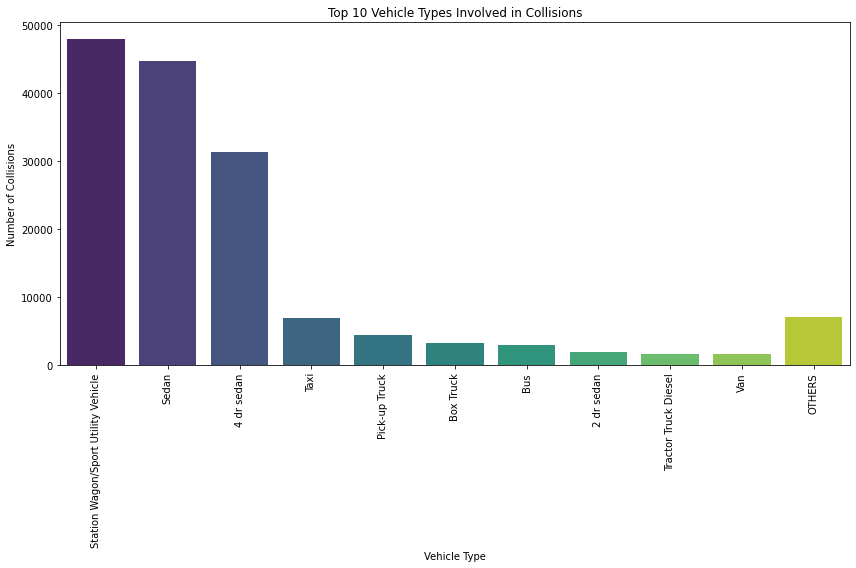

In [25]:
# Create a bar plot for vehicle type distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=top_vehicle_types['VEHICLE_TYPE'], y=top_vehicle_types['COLLISION_COUNT'], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Collisions')
plt.title('Top 10 Vehicle Types Involved in Collisions')
plt.tight_layout()
plt.show()

1. Among the top collision-involved vehicle types, 'Station Wagon/Sport Utility Vehicle' and 'Sedan' lead with 48,000 and 44,759 collisions respectively. 
2. Interestingly, variations in naming, such as '4 dr sedan' and '2 dr sedan,' contribute to different range collision occurrences. Additionally, 'Taxi' and 'Pick-up Truck' are also frequently involved in collisions.
4. The prominence of 'Station Wagon/Sport Utility Vehicle' and 'Sedan' in collision counts could indicate their higher usage on the roads, possibly suggesting that more common vehicle types are more prone to accidents. 

In [26]:
# split the comma seperated list and count the values present in them.
data['VEHICLE_DAMAGES_SEVERITY'] = data['VEHICLE_DAMAGES'].apply(lambda x: len(x.split(',')))
data.head()

,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,VEHICLE_TYPE,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,PRE_CRASH,POINT_OF_IMPACT,PUBLIC_PROPERTY_DAMAGE,CONTRIBUTING_FACTOR_1,VEHICLE_DAMAGES,VEHICLE_DAMAGES_SEVERITY
0,3493857,2012-07-31,13:30,591401,Box Truck,1997,West,0,M,Licensed,Changing Lanes,Right Side Doors,N,Driver Inattention/Distraction,Right Side Doors,1
1,3518768,2012-09-12,12:20,780983,Sedan,2000,South,1,M,Licensed,Making Left Turn,Left Front Bumper,N,Driver Inexperience,"Left Front Bumper,Center Front End,Left Front ...",3
2,3576809,2012-12-09,12:03,1178874,Taxi,2015,West,0,M,Licensed,Entering Parked Position,Right Rear Quarter Panel,N,Passing Too Closely,Right Rear Quarter Panel,1
3,3421148,2013-04-05,09:40,453654,Station Wagon/Sport Utility Vehicle,2015,North,1,M,Licensed,Backing,Left Front Quarter Panel,N,Unspecified,Left Front Quarter Panel,1
4,3467155,2013-06-23,08:30,437750,4 dr sedan,2012,South,2,F,Licensed,Going Straight Ahead,Right Rear Bumper,N,Unspecified,"Right Rear Bumper,Center Back End,Left Rear Bu...",3


##### Analysis of Vehicle Damages Severity Types and Collision Counts

In [27]:
# Calculate the severity of accidents for each vehicle type
Severity_of_damage = data.groupby('VEHICLE_DAMAGES_SEVERITY').size().reset_index(name='COLLISION_COUNT')
severity_mapping = {
    1: 'MILD',
    2: 'MODERATE',
    3: 'SEVERE',
    4: 'FATAL'
}
# Replace severity levels with labels
data['VEHICLE_DAMAGES_SEVERITY_TYPE'] = data['VEHICLE_DAMAGES_SEVERITY'].replace(severity_mapping)
data.head()

,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,VEHICLE_TYPE,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,PRE_CRASH,POINT_OF_IMPACT,PUBLIC_PROPERTY_DAMAGE,CONTRIBUTING_FACTOR_1,VEHICLE_DAMAGES,VEHICLE_DAMAGES_SEVERITY,VEHICLE_DAMAGES_SEVERITY_TYPE
0,3493857,2012-07-31,13:30,591401,Box Truck,1997,West,0,M,Licensed,Changing Lanes,Right Side Doors,N,Driver Inattention/Distraction,Right Side Doors,1,MILD
1,3518768,2012-09-12,12:20,780983,Sedan,2000,South,1,M,Licensed,Making Left Turn,Left Front Bumper,N,Driver Inexperience,"Left Front Bumper,Center Front End,Left Front ...",3,SEVERE
2,3576809,2012-12-09,12:03,1178874,Taxi,2015,West,0,M,Licensed,Entering Parked Position,Right Rear Quarter Panel,N,Passing Too Closely,Right Rear Quarter Panel,1,MILD
3,3421148,2013-04-05,09:40,453654,Station Wagon/Sport Utility Vehicle,2015,North,1,M,Licensed,Backing,Left Front Quarter Panel,N,Unspecified,Left Front Quarter Panel,1,MILD
4,3467155,2013-06-23,08:30,437750,4 dr sedan,2012,South,2,F,Licensed,Going Straight Ahead,Right Rear Bumper,N,Unspecified,"Right Rear Bumper,Center Back End,Left Rear Bu...",3,SEVERE


In [28]:
Damage_Counts = data['VEHICLE_DAMAGES_SEVERITY_TYPE'].value_counts().reset_index(name='COLLISION_COUNT')
Damage_Counts = Damage_Counts.rename(columns={'index': 'VEHICLE_DAMAGES_SEVERITY_TYPE'})
Damage_Counts

,VEHICLE_DAMAGES_SEVERITY_TYPE,COLLISION_COUNT
0,MILD,86478
1,MODERATE,33348
2,SEVERE,21816
3,FATAL,12629


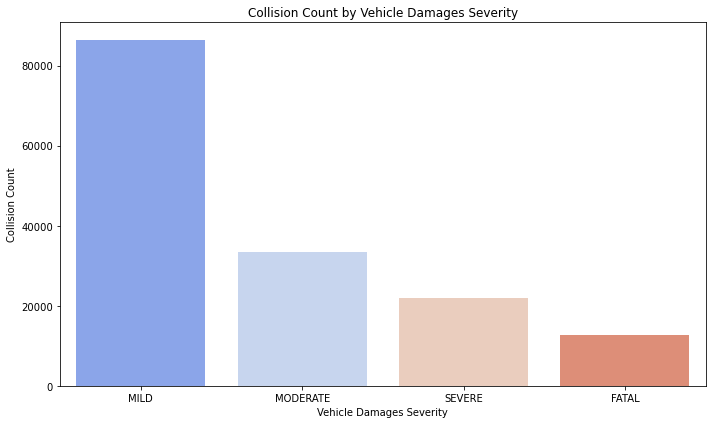

In [29]:
# Create a bar plot with the 'coolwarm' color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='VEHICLE_DAMAGES_SEVERITY_TYPE', y='COLLISION_COUNT', data=Damage_Counts, palette='coolwarm')
plt.xlabel('Vehicle Damages Severity')
plt.ylabel('Collision Count')
plt.title('Collision Count by Vehicle Damages Severity')
plt.tight_layout()
plt.show()

1. The data presents an overview of collision counts categorized by different levels of vehicle damages severity: 'MILD,' 'MODERATE,' 'SEVERE,' and 'FATAL.'
2. The majority of collisions resulted in 'MILD' damages (86,478 incidents), followed by 'MODERATE' (33,348), 'SEVERE' (21,816), and 'FATAL' (12,629). 
3.  The higher prevalence of 'MILD' damages compared to other severity types indicates that most collisions result in minor damages. 
4. This suggests that traffic safety measures and road design improvements might be effectively reducing the occurrence of severe and fatal accidents.

### 2. What are the most common contributing factors to collisions, and do these factors vary based on vehicle characteristics or driver demographics?


##### Analysis of Collision Factors and accident Counts

In [30]:
contributing_factor_counts = data['CONTRIBUTING_FACTOR_1'].value_counts().reset_index(name='COLLISION_COUNT')
contributing_factor_counts = contributing_factor_counts.rename(columns={'index': 'CONTRIBUTING_FACTOR_1'})

# Top contributing factors
top_contributing_factors = contributing_factor_counts.head(10)
top_contributing_factors = top_contributing_factors[top_contributing_factors['CONTRIBUTING_FACTOR_1'] != 'Unspecified']
top_contributing_factors

,CONTRIBUTING_FACTOR_1,COLLISION_COUNT
1,Driver Inattention/Distraction,24380
2,Following Too Closely,10058
3,Failure to Yield Right-of-Way,6658
4,Passing or Lane Usage Improper,4303
5,Backing Unsafely,4087
6,Unsafe Lane Changing,3977
7,Other Vehicular,3469
8,Passing Too Closely,3431
9,Turning Improperly,2622


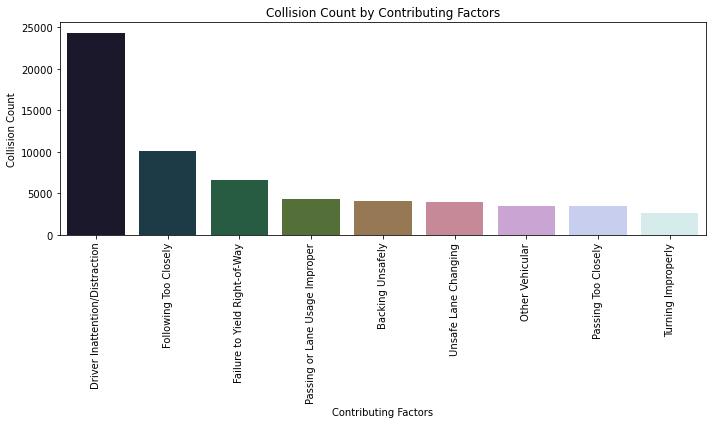

In [31]:

# Create a bar plot for contributing factors
plt.figure(figsize=(10, 6))
sns.barplot(x='CONTRIBUTING_FACTOR_1', y='COLLISION_COUNT', data=top_contributing_factors, palette='cubehelix')
plt.xticks(rotation=90)
plt.xlabel('Contributing Factors')
plt.ylabel('Collision Count')
plt.title('Collision Count by Contributing Factors')
plt.tight_layout()
plt.show()

1. The data provides insights into the leading contributing factors for collisions. 
2. 'Driver Inattention/Distraction' tops the list with 24,380 collision occurrences, followed by 'Following Too Closely' (10,058) and 'Failure to Yield Right-of-Way' (6,658). 
3. These findings highlight common risky behaviors that contribute to accidents, underscoring the need for improved driver awareness and adherence to traffic rules.

### 3. Is there any correlation between the age of vehicles and the severity of collisions they are involved in?


In [78]:
X = data['VEHICLE_YEAR']
y = data['VEHICLE_DAMAGES_SEVERITY']
X = sm.add_constant(X)  # Adding a constant for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     VEHICLE_DAMAGES_SEVERITY   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                  0.002
Method:                       Least Squares   F-statistic:                     236.4
Date:                      Thu, 17 Aug 2023   Prob (F-statistic):           2.68e-53
Time:                              10:38:36   Log-Likelihood:            -2.1597e+05
No. Observations:                    154271   AIC:                         4.319e+05
Df Residuals:                        154269   BIC:                         4.320e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

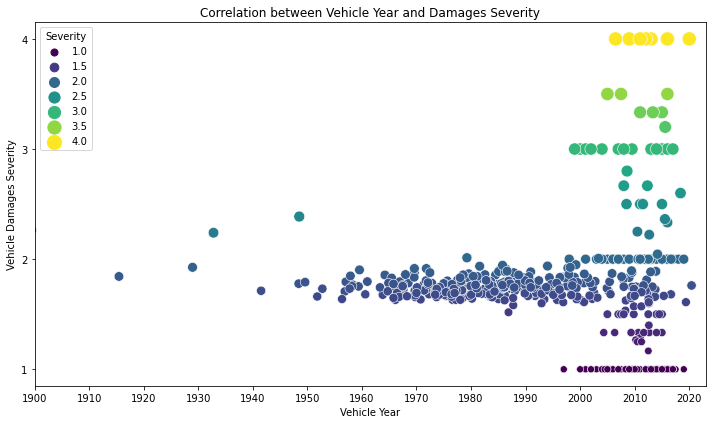

In [74]:
current_year = 2023
data['VEHICLE_AGE'] = current_year - data['VEHICLE_YEAR']
yearly_data = data.groupby('CRASH_DATE').mean()
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_data, x='VEHICLE_YEAR', y='VEHICLE_DAMAGES_SEVERITY', hue='VEHICLE_DAMAGES_SEVERITY', palette='viridis', size='VEHICLE_DAMAGES_SEVERITY', sizes=(50, 200))
plt.xlabel('Vehicle Year')
plt.ylabel('Vehicle Damages Severity')
plt.title('Correlation between Vehicle Year and Damages Severity')
plt.legend(title='Severity')
# Now the scatter plot correctly shows the vehicle year on the x-axis while representing the correlation between vehicle year and damages severity using color and size.
plt.xticks(range(1900, 2024, 10))  # Adjust the interval as needed
plt.xlim(1900, current_year)
plt.yticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()



1. We are able to see the severity of vehicle damages are equally mild and fatal for the one's purchased between 2000 to 2020. 
2. Moderate damages made for the ones those are aged and more number of vehicles are moderately damaged those are bought from 1960's to 2020's. 
3. Again Severe damages are made with vehicle year purchased from 2000 to 2020.
4. Possiby this is due to the reason maximum cars drove in NY state were purchased between 2000 to 2020 when this survey was collected.

### 4. How does driver gender impact collision rates and severity? Are there notable differences between male and female drivers in terms of the types of collisions they are involved in?

##### Analysis of Collision Counts by Gender

In [71]:
collision_count_by_gender = data['DRIVER_SEX'].value_counts()
collision_count_by_gender

M    112629
F     41156
U       486
Name: DRIVER_SEX, dtype: int64

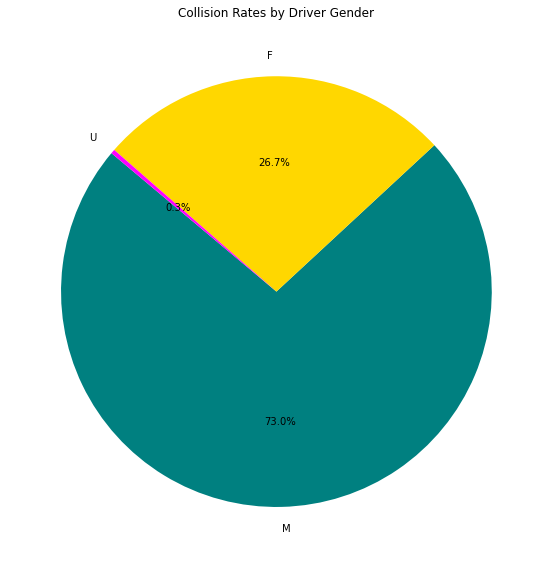

In [70]:
# Collision Rates by Driver Gender: You can create a count plot to compare collision rates between male and female drivers
custom_colors = ['teal', 'gold', 'magenta' ]

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(collision_count_by_gender, labels=collision_count_by_gender.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Collision Rates by Driver Gender')
plt.tight_layout()
plt.show()

1. The analysis of collision counts by gender reveals that a higher proportion of collisions involve male drivers compared to female drivers. 
2. This suggests that, in the dataset, male drivers are more frequently involved in accidents. Additionally, a small percentage of collisions have Unknown gender information.
3. we can formulate a hypothesis: "Male drivers may exhibit different driving behaviors or risk-taking tendencies compared to female drivers, potentially contributing to the higher collision involvement."

##### Analysis of Vehicle Damages Severity by Gender

In [68]:
# Group by driver gender and calculate average collision severity by Gender.
average_severity_by_gender = data.groupby('DRIVER_SEX')['VEHICLE_DAMAGES_SEVERITY'].mean()
average_severity_by_gender

DRIVER_SEX
F    1.822407
M    1.716379
U    1.689300
Name: VEHICLE_DAMAGES_SEVERITY, dtype: float64

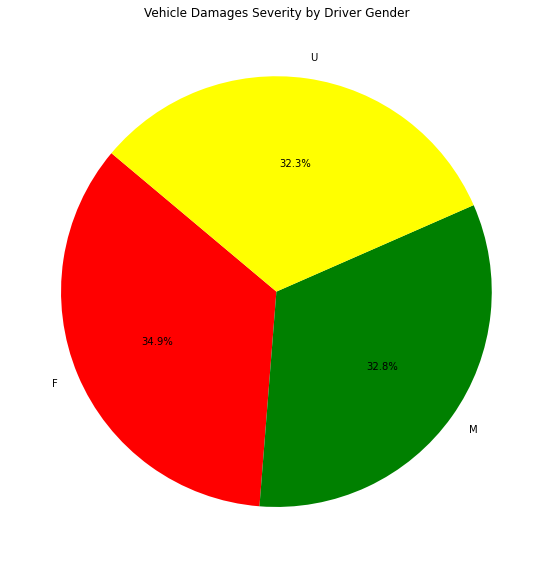

In [72]:
custom_colors = ['red', 'Green', 'Yellow' ]
plt.figure(figsize=(8, 8))
collision_count_by_gender = data['DRIVER_SEX'].value_counts()
plt.pie(average_severity_by_gender, labels=average_severity_by_gender.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Vehicle Damages Severity by Driver Gender')
plt.tight_layout()
plt.show()

1. On average, female drivers ('F') have a slightly higher vehicle damages severity score of 1.822, compared to male drivers ('M') with 1.716 and unknown ('U') gender drivers with 1.689. 
2. These marginal differences suggest that, in this dataset, female drivers tend to experience slightly more severe vehicle damages on average. 
3. Further investigation may uncover the factors contributing to this disparity and inform targeted safety measures.

### 5. Visualize the trend of collisions over time using a time series plot.


##### Analysis of Collisions over years from 2012 to 2021

In [36]:
data['CRASH_YEAR'] = data['CRASH_DATE'].dt.year

# Group by year and count collisions
collision_count_by_year = data['CRASH_YEAR'].value_counts().sort_index().reset_index(name='COLLISION_COUNT')
collision_count_by_year = collision_count_by_year.rename(columns={'index': 'CRASH_YEAR'})

In [37]:
collision_count_by_year

,CRASH_YEAR,COLLISION_COUNT
0,2012,3
1,2013,18
2,2014,12
3,2015,61
4,2016,151167
5,2017,905
6,2018,303
7,2019,738
8,2020,1035
9,2021,29


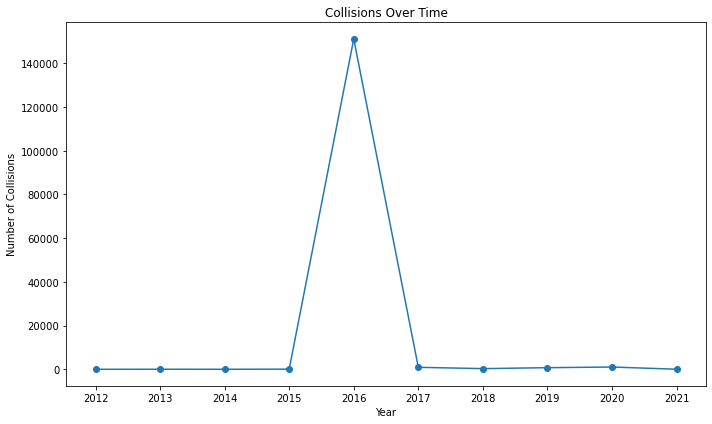

In [38]:
# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(collision_count_by_year['CRASH_YEAR'], collision_count_by_year['COLLISION_COUNT'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Collisions Over Time')
plt.xticks(range(2012, 2022,1))
plt.tight_layout()
plt.show()

1. The provided data offers a comprehensive overview of collision counts spanning from 2012 to 2021. 
2. The most significant surge in collisions occurred in 2016, with a remarkably high count of 151,167 incidents. 
3. The subsequent years, such as 2017, 2018, and 2019, experienced relatively fewer collisions. 
4. The analysis reveals dynamic trends in collision occurrences over these years, emphasizing the importance of tracking yearly patterns for effective road safety planning and interventions.

##### Analysis of Collisions by Month in 2016

In [40]:
Year_2016 = data[data['CRASH_YEAR']==2016]
Year_2016['CRASH_MONTH_2016'] = Year_2016['CRASH_DATE'].dt.month
Year_2016 = Year_2016['CRASH_MONTH_2016'].value_counts().sort_index().reset_index(name='COLLISION_COUNT')
Year_2016 = Year_2016.rename(columns={'index': 'CRASH_MONTH_2016'})
Year_2016

,CRASH_MONTH_2016,COLLISION_COUNT
0,1,27
1,2,25
2,3,8253
3,4,14381
4,5,16388
5,6,16856
6,7,15983
7,8,16116
8,9,15933
9,10,16253


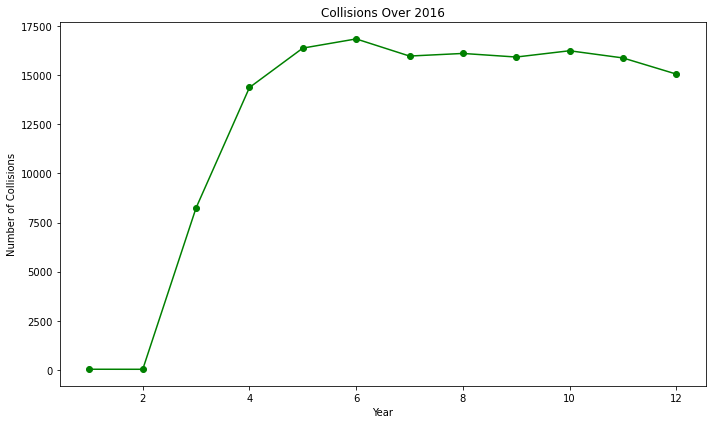

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(Year_2016['CRASH_MONTH_2016'], Year_2016['COLLISION_COUNT'], marker='o', color = 'green')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Collisions Over 2016')
plt.tight_layout()
plt.show()

1. The presented data focuses on collision counts per month during the year 2016. 
2. Notably, the highest number of accidents occurred in March, April, May, and June, peaking at 16,856 collisions in June. 
3. This pattern could be attributed to various factors such as increased traffic, or seasonal events during holidays in month of June. 
4. Analyzing collision trends by month provides valuable insights for targeted safety measures and road management strategies.

### 6. What is the maximum number of vehicles involved in a single collision, and how many collisions had this maximum number of vehicle intersections?

##### There are collision ID that are duplicated : mean multiple vehicle involved in single collision 

In [42]:
data["COLLISION_ID"].duplicated().sum()

37092

##### Aggregate vehicle IDs by Collision ID : Max no. of vehicles involved in single collision is 6. 

In [43]:
collision_vehicle_count = data.groupby("COLLISION_ID").agg({
    "VEHICLE_ID": "count",
}).reset_index()
unique_car_counts = collision_vehicle_count["VEHICLE_ID"].nunique()
sort_collision_vehicle_count = collision_vehicle_count.sort_values(by="VEHICLE_ID", ascending=False).reset_index(drop=True)
sort_collision_vehicle_count

,COLLISION_ID,VEHICLE_ID
0,3501692,6
1,3454136,6
2,3434859,6
3,3478656,5
4,3445871,5
...,...,...
117174,3480815,1
117175,3480812,1
117176,3480809,1
117177,3480804,1


In [44]:
collision_vehicle_count = sort_collision_vehicle_count.groupby("VEHICLE_ID")["COLLISION_ID"].count().reset_index(name='COLLISION_COUNT')
collision_vehicle_count = collision_vehicle_count.sort_values(by="VEHICLE_ID", ascending=False).reset_index(drop=True)
collision_vehicle_count.rename(columns={'VEHICLE_ID': 'NO_OF_VEHICLES'}, inplace=True)
collision_vehicle_count

,NO_OF_VEHICLES,COLLISION_COUNT
0,6,3
1,5,10
2,4,98
3,3,1013
4,2,34717
5,1,81338


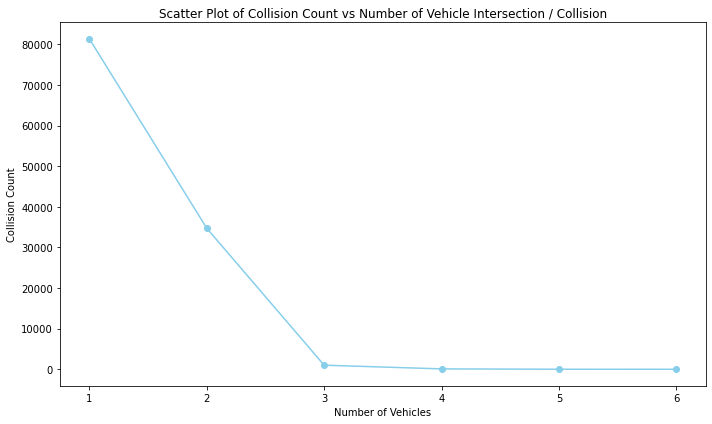

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(collision_vehicle_count['NO_OF_VEHICLES'], collision_vehicle_count['COLLISION_COUNT'],marker='o', color='skyblue')
plt.xlabel('Number of Vehicles')
plt.ylabel('Collision Count')
plt.title('Scatter Plot of Collision Count vs Number of Vehicle Intersection / Collision')
plt.tight_layout()
plt.show()
# This will create a scatter plot with the number of vehicles on the x-axis and the collision count on the y-axis. Each point is labeled with its corresponding index for identification.








1. The analysis reveals that the maximum number of vehicles involved in a single collision is 6, and this specific scenario occurred in 3 collisions. 
2. This insight emphasizes the diversity of collision scenarios, ranging from single-vehicle incidents to those involving multiple vehicles, with varying levels of impact and complexity.

### 7. During which time period did the majority of accidents occur in New York State?

##### Analysis of Collisions by Period: Day vs. Night

In [47]:
# Extract the hour from 'CRASH_TIME'
data['CRASH_TIME'] = pd.to_datetime(data['CRASH_TIME'], format='%H:%M')
data['HOUR'] = data['CRASH_TIME'].dt.hour

In [66]:
collision_by_period

Day      102277
Night     51994
Name: TIME_PERIOD, dtype: int64

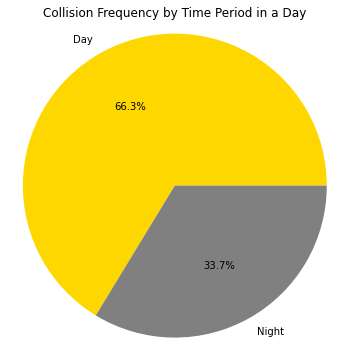

The majority of accidents occurred during the Day period.


In [48]:
data['TIME_PERIOD'] = data['HOUR'].apply(lambda hour: 'Day' if 6 <= hour < 18 else 'Night')

# Count collisions by time period
collision_by_period = data['TIME_PERIOD'].value_counts()

plt.figure(figsize=(6, 6))

# Plotting the pie chart
plt.pie(collision_by_period, labels=collision_by_period.index, autopct='%1.1f%%', colors=['Gold', 'Grey'])
plt.title('Collision Frequency by Time Period in a Day')
plt.axis('equal') 
plt.show()

# Identify the period with the highest collision frequency
max_period = collision_by_period.idxmax()

print(f"The majority of accidents occurred during the {max_period} period.")

1. The data illustrates a significant contrast in collision occurrences between two periods: 'Day' and 'Night.' 
2. During the 'Day,' there were 102,277 collisions which is 66.3%, while during the 'Night,' there were 51,994 collisions that would leave 33.7% accidents. 
3. This disparity suggests a higher incidence of collisions during the daytime, highlighting potential differences in driving behavior, visibility, and road conditions between these periods.

### 8. What are the common situations or events that occurred immediately before collisions? Are there any patterns in pre-crash events that is lead by Driver Sex?

##### Gender Disparities in Pre-Crash Scenarios

In [65]:
# Group and aggregate data
pre_crash_damage_counts = data.groupby(['PRE_CRASH', 'DRIVER_SEX']).size().unstack(fill_value=0)
# Normalize the counts for better visualization
pre_crash_damage_normalized = pre_crash_damage_counts.div(pre_crash_damage_counts.sum(axis=1), axis=0)
pre_crash_damage_normalized

DRIVER_SEX,F,M,U
PRE_CRASH,,,
Avoiding Object in Roadway,0.295699,0.693548,0.010753
Backing,0.268790,0.728389,0.002821
Changing Lanes,0.247829,0.749638,0.002533
Entering Parked Position,0.311770,0.686144,0.002087
Going Straight Ahead,0.260558,0.736614,0.002828
Making Left Turn,0.287476,0.710684,0.001840
Making Left Turn on Red,0.305556,0.694444,0.000000
Making Right Turn,0.253076,0.743519,0.003405
Making Right Turn on Red,0.297297,0.621622,0.081081


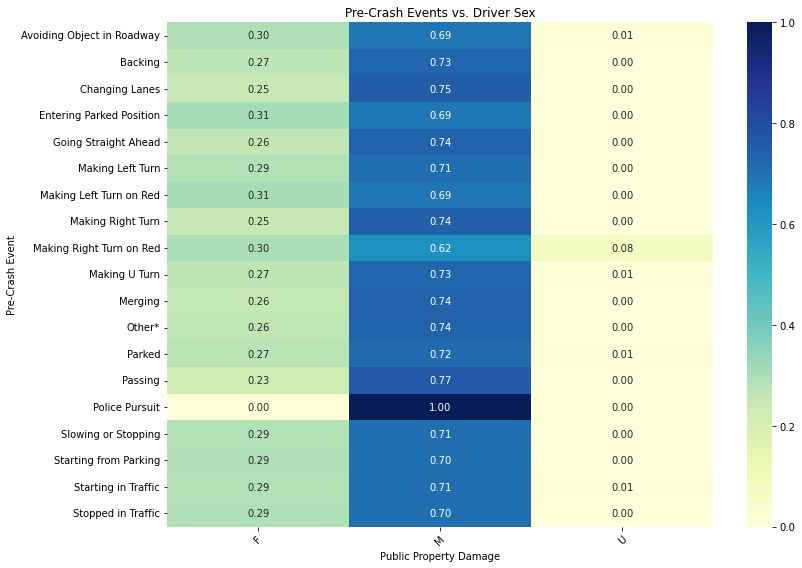

In [51]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pre_crash_damage_normalized, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
plt.xlabel('Public Property Damage')
plt.ylabel('Pre-Crash Event')
plt.title('Pre-Crash Events vs. Driver Sex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. In the resulting heatmap, each cell represents the proportion of collisions with a specific pre-crash event and property damage level. Darker colors indicate higher proportions of collisions.
2. This visualization can help us identify patterns in pre-crash events that lead by Male/ Female/ Unknown.
3. The data indicates that female drivers ('F') tend to have a higher involvement in avoiding objects in the roadway, while male drivers ('M') are more likely to be engaged in backing and changing lanes. 
4. However, these trends are not consistent across all scenarios, suggesting complex gender-related patterns in pre-crash behavior.

### 9. What is the relationship between driver's license status and the frequency of accidents? Are certain driver's license statuses associated with a higher incidence of accidents?

##### Analysis of Driver License Status and Collision Counts

In [52]:
license_status_counts = data.groupby('DRIVER_LICENSE_STATUS').size().reset_index(name='COLLISION_COUNT')
license_status_counts = license_status_counts.sort_values(by='COLLISION_COUNT', ascending =False).reset_index(drop=True)
license_status_counts

,DRIVER_LICENSE_STATUS,COLLISION_COUNT
0,Licensed,150661
1,Unlicensed,2594
2,Permit,1016


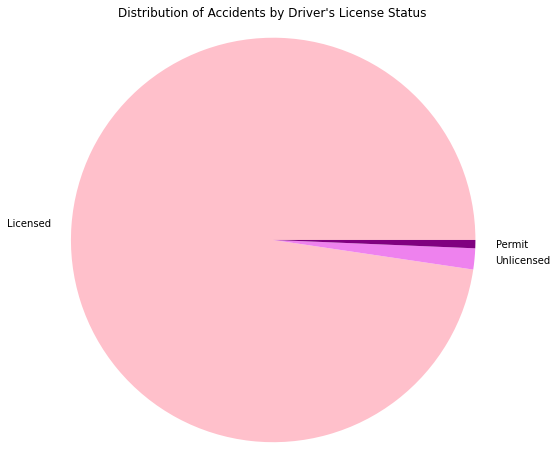

In [53]:
license_status_counts = data['DRIVER_LICENSE_STATUS'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(license_status_counts, labels=license_status_counts.index, colors=['Pink','Violet','Purple'])
plt.title("Distribution of Accidents by Driver's License Status")
plt.axis('equal') 
plt.show()

# autopct='%1.1f%%'

1. 'Licensed' drivers are involved in the majority of collisions (150661), while 'Unlicensed' drivers and those with a 'Permit' have notably lower collision involvement (2594 and 1016 collisions, respectively).
2. This underscores the importance of ensuring proper licensing and training to potentially reduce collision rates and enhance road safety.

### 10. Which types of vehicle damages are most prevalent in collisions, and are there correlations with specific contributing factors?

#####  Point of Impact and Collision Count Analysis

In [54]:
vehicle_Damage_Counts = data.groupby('POINT_OF_IMPACT').size().reset_index(name='COLLISION_COUNT')
vehicle_Damage_Counts = vehicle_Damage_Counts.sort_values(by='COLLISION_COUNT', ascending =False).reset_index(drop=True)
vehicle_Damage_Counts

,POINT_OF_IMPACT,COLLISION_COUNT
0,Center Front End,24970
1,Center Back End,19864
2,Left Front Bumper,19374
3,Right Front Bumper,18116
4,Right Front Quarter Panel,12268
5,Left Front Quarter Panel,10553
6,Left Rear Quarter Panel,7964
7,Left Side Doors,7879
8,Right Side Doors,7854
9,Left Rear Bumper,7277


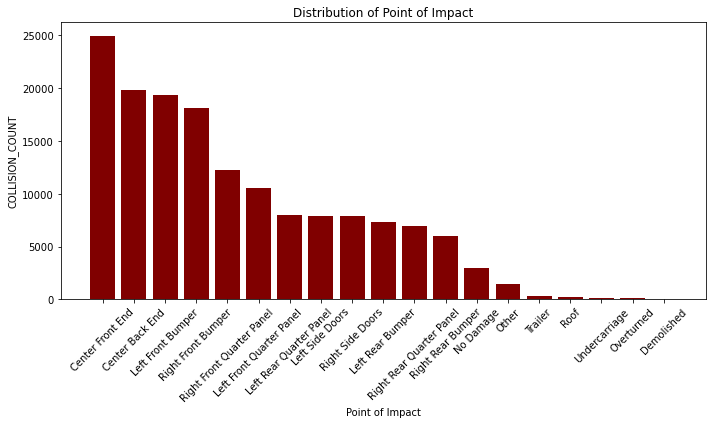

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(point_of_impact_counts['POINT_OF_IMPACT'], point_of_impact_counts['COLLISION_COUNT'], color = 'maroon') 
plt.xlabel('Point of Impact')
plt.ylabel('COLLISION_COUNT')
plt.title('Distribution of Point of Impact')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. The 'Center Front End' and 'Center Back End' are the most common points of impact, with collision counts of 24970 and 19864, respectively.
2. Impact locations like 'Demolished,' 'Overturned,' and 'Roof' have relatively low collision counts, suggesting less frequent occurrences.
3. The dataset can aid in understanding collision patterns and potentially guide safety measures and design improvements in vehicles.

##### Correlations between Vehicle Damages and Top 10 Contributing Factors

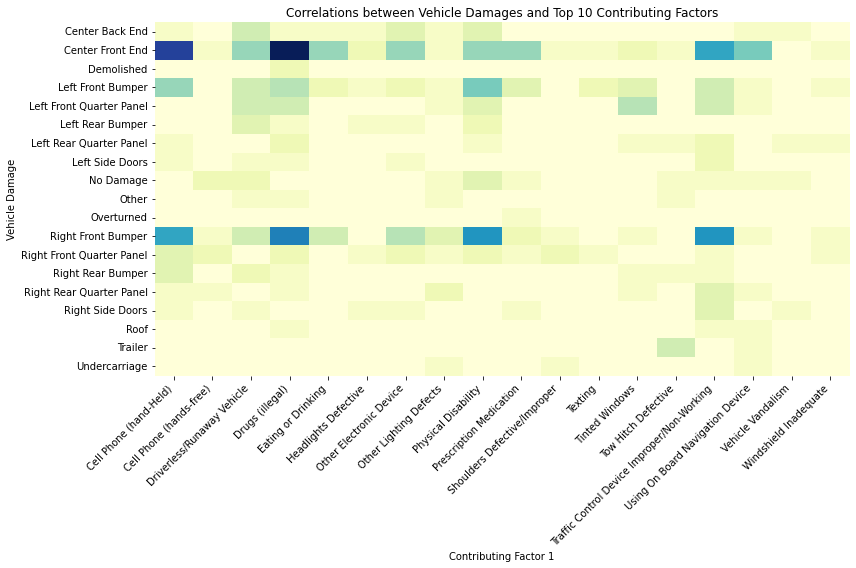

In [56]:
top_contributing_factors = data['CONTRIBUTING_FACTOR_1'].value_counts().sort_values().head(20).index.tolist()

# Step 4: Filter the data and create a pivot table
filtered_data = data[data['CONTRIBUTING_FACTOR_1'].isin(top_contributing_factors) & ~data['CONTRIBUTING_FACTOR_1'].isin(['1', '80'])]
pivot_table = filtered_data.pivot_table(index='POINT_OF_IMPACT', columns='CONTRIBUTING_FACTOR_1', aggfunc='size', fill_value=0)

# Step 5: Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=False)
plt.xlabel('Contributing Factor 1')
plt.ylabel('Vehicle Damage')
plt.title('Correlations between Vehicle Damages and Top 10 Contributing Factors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### We are able to see the correlation between vehicle damages and contributing factors for the collision.
1. Majorly due to Drugs intake, speaking on mobile(hand held) and improper working of traffic control device led to the damage of Center Front End and Right Front Bumper of vehicle.

### 11. What is the correlation between the severity of vehicle damages and the vehicle's age,

In [64]:
Occupants_Impact = ['VEHICLE_DAMAGES_SEVERITY', 'VEHICLE_AGE']
correlation_data = data[Occupants_Impact]
correlation_matrix = correlation_data.corr()
correlation_matrix

,VEHICLE_DAMAGES_SEVERITY,VEHICLE_AGE
VEHICLE_DAMAGES_SEVERITY,1.000000,-0.039112
VEHICLE_AGE,-0.039112,1.000000


1. The correlation matrix indicates a very weak negative correlation between vehicle damages severity and vehicle age, suggesting that as vehicle age increases slightly, damages severity tends to decrease slightly which is quite suprising insights found.

### 12. How does the distribution of collision counts vary by different travel directions?

##### Count of Travel directions in the Dataset

In [13]:
travel_direction_counts = data.groupby('TRAVEL_DIRECTION').size().reset_index(name='COLLISION_COUNT')
travel_direction_counts

,TRAVEL_DIRECTION,COLLISION_COUNT
0,-,156
1,E,62
2,East,35708
3,N,71
4,North,35357
5,Northeast,2619
6,Northwest,2378
7,S,82
8,South,34835
9,Southeast,2456


##### Analysis of Collision Counts by Travel Direction

In [14]:
data['TRAVEL_DIRECTION'] = data['TRAVEL_DIRECTION'].replace({
    'E': 'East',
    'N': 'North',
    'S':'South',
    '-':'Unknown',
    'U':'Unknown',
    'W':'West'
})
travel_direction_counts = data.groupby('TRAVEL_DIRECTION').size().reset_index(name='COLLISION_COUNT')
travel_direction_counts.sort_values(by='COLLISION_COUNT', ascending = False)

,TRAVEL_DIRECTION,COLLISION_COUNT
8,West,36119
0,East,35770
1,North,35428
4,South,34917
2,Northeast,2619
5,Southeast,2456
3,Northwest,2378
6,Southwest,2355
7,Unknown,2213


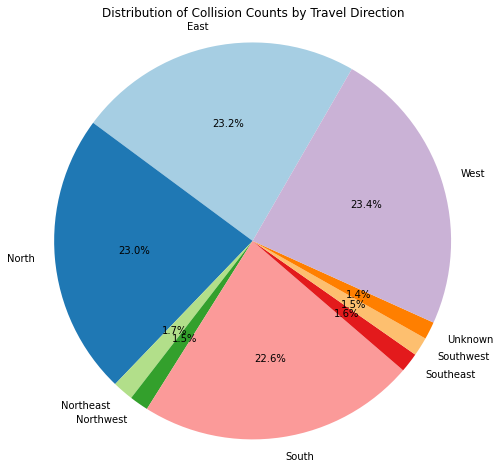

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(travel_direction_counts['COLLISION_COUNT'], labels=travel_direction_counts['TRAVEL_DIRECTION'], autopct='%1.1f%%', colors=plt.cm.Paired.colors,startangle=60, labeldistance=1.1)
plt.title('Distribution of Collision Counts by Travel Direction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

1. Among the directions, 'West' has the highest collision count with 36,119 incidents, followed closely by 'East' with 35,770, 'North' with 35,428, and 'South' with 34,917. 
2. Variations in travel directions, such as 'Northeast,' 'Southeast,' 'Northwest,' and 'Southwest,' also contribute to collision occurrences.
3. The nearly balanced distribution of collisions among the cardinal directions (East, West, North, South) suggests that collision incidents are relatively evenly spread across these directions.
4. However, the variations in travel directions (e.g., 'Northeast,' 'Southeast') might indicate certain specific areas or intersections where collisions are more concentrated due to traffic patterns, road layouts, or other factors.
4. Further geographic and contextual analysis is needed to explore these trends and identify potential areas of increased collision risk.

### CONCLUSION

1. In conclusion, the analysis of vehicle collisions in NY reveals valuable insights that shed light on various aspects of road safety. 
2. The dominance of 'Station Wagon/Sport Utility Vehicle' and 'Sedan' in collision counts indicates a potential correlation between common vehicle types and accident prevalence. 
3. The prevalence of 'MILD' damages underscores the importance of ongoing road safety measures and their positive impact on reducing severe and fatal accidents. 
4. The prevalence of risky behaviors like 'Driver Inattention/Distraction,' 'Following Too Closely,' and 'Failure to Yield Right-of-Way' underscores the need for enhanced driver awareness and adherence to traffic rules. 
5. The disparities in collision involvement based on gender highlight the potential impact of different driving behaviors and tendencies among male and female drivers.
6. The trends over time and by month emphasize the importance of monitoring and addressing yearly and seasonal fluctuations in collision occurrences. 
7. To improve road safety in NY state, authorities could focus on targeted awareness campaigns, stricter enforcement of traffic rules, and investing in road infrastructure improvements at high-risk intersections.
8. Moreover, continuous data analysis and collaboration between transportation agencies and local communities could drive more effective interventions to mitigate collision risks and enhance overall road safety.